In [1]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
!pip install wordcloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
import string
import re
from textblob import TextBlob
from wordcloud import WordCloud
!pip install contractions

import contractions

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Utkarsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Utkarsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Utkarsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
df = pd.read_excel('KUKUni.xlsx')

In [7]:
df.head()

,review,Sentiment
0,"Overall, nit kurukshetra is a good place to st...",good
1,"Hi Chetna ,\n\nI am not sure in which context ...",good
2,I am from UIET Kurukshetra University 2015 pas...,good
3,University inculcates good scientific and spir...,good
4,I am a Kurukshetra University graduate and its...,good


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     100 non-null    object
 1   Sentiment  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [9]:
df['review']

0     Overall, nit kurukshetra is a good place to st...
1     Hi Chetna ,\n\nI am not sure in which context ...
2     I am from UIET Kurukshetra University 2015 pas...
3     University inculcates good scientific and spir...
4     I am a Kurukshetra University graduate and its...
                            ...                        
95    This is the most fucked up University one will...
96    if u wanted to ruin your life completely and a...
97    Overall, in few words, “ not satisfactory!”\n\...
98    It was yesterday when i wrote my final exam be...
99    In my opinion, This is the most fucked up Univ...
Name: review, Length: 100, dtype: object

In [10]:
df.isnull().sum()

review       0
Sentiment    0
dtype: int64

In [11]:
df= df.dropna()
df.isnull().sum()

review       0
Sentiment    0
dtype: int64

In [12]:
df.duplicated().sum()

24

In [13]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 0 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     76 non-null     object
 1   Sentiment  76 non-null     object
dtypes: object(2)
memory usage: 1.8+ KB


In [15]:
df['Sentiment'].value_counts()

Sentiment
bad     43
good    33
Name: count, dtype: int64

In [16]:
#NLP

In [17]:
#lowercase
df['review']= df['review'].str.lower()
df['review'].head()

0    overall, nit kurukshetra is a good place to st...
1    hi chetna ,\n\ni am not sure in which context ...
2    i am from uiet kurukshetra university 2015 pas...
3    university inculcates good scientific and spir...
4    i am a kurukshetra university graduate and its...
Name: review, dtype: object

In [18]:
#expanding abrrivieations
def remove_abb(data):
     data = re.sub(r"he's", "he is", data)
     data = re.sub(r"there's", "there is", data)
     data = re.sub(r"We're", "We are", data)
     data = re.sub(r"That's", "That is", data)
     data = re.sub(r"won't", "will not", data)
     data = re.sub(r"they're", "they are", data)
     data = re.sub(r"Can't", "Cannot", data)
     data = re.sub(r"wasn't", "was not", data)
     data = re.sub(r"don\x89Ûªt", "do not", data)
     data= re.sub(r"aren't", "are not", data)
     data = re.sub(r"isn't", "is not", data)
     data = re.sub(r"What's", "What is", data)
     data = re.sub(r"haven't", "have not", data)
     data = re.sub(r"hasn't", "has not", data)
     data = re.sub(r"There's", "There is", data)
     data = re.sub(r"He's", "He is", data)
     data = re.sub(r"It's", "It is", data)
     data = re.sub(r"You're", "You are", data)
     data = re.sub(r"I'M", "I am", data)
     data = re.sub(r"shouldn't", "should not", data)
     data = re.sub(r"wouldn't", "would not", data)
     data = re.sub(r"i'm", "I am", data)
     data = re.sub(r"I\x89Ûªm", "I am", data)
     data = re.sub(r"I'm", "I am", data)
     data = re.sub(r"Isn't", "is not", data)
     data = re.sub(r"Here's", "Here is", data)
     data = re.sub(r"you've", "you have", data)
     data = re.sub(r"you\x89Ûªve", "you have", data)
     data = re.sub(r"we're", "we are", data)
     data = re.sub(r"what's", "what is", data)
     data = re.sub(r"couldn't", "could not", data)
     data = re.sub(r"we've", "we have", data)
     data = re.sub(r"it\x89Ûªs", "it is", data)
     data = re.sub(r"doesn\x89Ûªt", "does not", data)
     data = re.sub(r"It\x89Ûªs", "It is", data)
     data = re.sub(r"Here\x89Ûªs", "Here is", data)
     data = re.sub(r"who's", "who is", data)
     data = re.sub(r"I\x89Ûªve", "I have", data)
     data = re.sub(r"y'all", "you all", data)
     data = re.sub(r"can\x89Ûªt", "cannot", data)
     data = re.sub(r"would've", "would have", data)
     data = re.sub(r"it'll", "it will", data)
     data = re.sub(r"we'll", "we will", data)
     data = re.sub(r"wouldn\x89Ûªt", "would not", data)
     data = re.sub(r"We've", "We have", data)
     data = re.sub(r"he'll", "he will", data)
     data = re.sub(r"Y'all", "You all", data)
     data = re.sub(r"Weren't", "Were not", data)
     data = re.sub(r"Didn't", "Did not", data)
     data = re.sub(r"they'll", "they will", data)
     data = re.sub(r"they'd", "they would", data)
     data = re.sub(r"DON'T", "DO NOT", data)
     data = re.sub(r"That\x89Ûªs", "That is", data)
     data = re.sub(r"they've", "they have", data)
     data = re.sub(r"i'd", "I would", data)
     data = re.sub(r"should've", "should have", data)
     data = re.sub(r"You\x89Ûªre", "You are", data)
     data = re.sub(r"where's", "where is", data)
     data = re.sub(r"Don\x89Ûªt", "Do not", data)
     data = re.sub(r"we'd", "we would", data)
     data = re.sub(r"i'll", "I will", data)
     data = re.sub(r"weren't", "were not", data)
     data = re.sub(r"They're", "They are", data)
     data = re.sub(r"Can\x89Ûªt", "Cannot", data)
     data = re.sub(r"you\x89Ûªll", "you will", data)
     data = re.sub(r"I\x89Ûªd", "I would", data)
     data = re.sub(r"let's", "let us", data)
     data = re.sub(r"it's", "it is", data)
     data = re.sub(r"can't", "cannot", data)
     data = re.sub(r"don't", "do not", data)
     data = re.sub(r"you're", "you are", data)
     data = re.sub(r"i've", "I have", data)
     data = re.sub(r"that's", "that is", data)
     data = re.sub(r"i'll", "I will", data)
     data = re.sub(r"doesn't", "does not",data)
     data = re.sub(r"i'd", "I would", data)
     data = re.sub(r"didn't", "did not", data)
     data = re.sub(r"ain't", "am not", data)
     data = re.sub(r"you'll", "you will", data)
     data = re.sub(r"I've", "I have", data)
     data = re.sub(r"Don't", "do not", data)
     data = re.sub(r"I'll", "I will", data)
     data = re.sub(r"I'd", "I would", data)
     data = re.sub(r"Let's", "Let us", data)
     data = re.sub(r"you'd", "You would", data)
     data = re.sub(r"It's", "It is", data)
     data = re.sub(r"Ain't", "am not", data)
     data = re.sub(r"Haven't", "Have not", data)
     data = re.sub(r"Could've", "Could have", data)
     data = re.sub(r"youve", "you have", data)
     data = re.sub(r"donå«t", "do not", data)
     return data

df['review']= df['review'].apply(remove_abb)
df['review']


0     overall, nit kurukshetra is a good place to st...
1     hi chetna ,\n\ni am not sure in which context ...
2     i am from uiet kurukshetra university 2015 pas...
3     university inculcates good scientific and spir...
4     i am a kurukshetra university graduate and its...
                            ...                        
93    each time it hurts when this question is asked...
94    fill up your answer sheets with stupid answers...
95    this is the most fucked up university one will...
97    overall, in few words, “ not satisfactory!”\n\...
99    in my opinion, this is the most fucked up univ...
Name: review, Length: 76, dtype: object

In [19]:
#spelling mistakes correct

def spell_correct(text):
    return TextBlob(str(text)).correct().string

df['review'].apply(spell_correct)
df['review'].head()

0    overall, nit kurukshetra is a good place to st...
1    hi chetna ,\n\ni am not sure in which context ...
2    i am from uiet kurukshetra university 2015 pas...
3    university inculcates good scientific and spir...
4    i am a kurukshetra university graduate and its...
Name: review, dtype: object

In [20]:
#removing punctuation

def remove_punctuation(text):
    for i in string.punctuation:
        if i in text:
            text = text.replace(i,'')
    return text 

df['review'] = df['review'].apply(remove_punctuation)

df['review'].head()

0    overall nit kurukshetra is a good place to stu...
1    hi chetna \n\ni am not sure in which context  ...
2    i am from uiet kurukshetra university 2015 pas...
3    university inculcates good scientific and spir...
4    i am a kurukshetra university graduate and its...
Name: review, dtype: object

In [21]:
#tokenization
df['tokenized_review'] = df['review'].apply(word_tokenize)
df['tokenized_review'].head()

0    [overall, nit, kurukshetra, is, a, good, place...
1    [hi, chetna, i, am, not, sure, in, which, cont...
2    [i, am, from, uiet, kurukshetra, university, 2...
3    [university, inculcates, good, scientific, and...
4    [i, am, a, kurukshetra, university, graduate, ...
Name: tokenized_review, dtype: object

In [22]:
#stop words removal
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in text if word.lower() not in stop_words]
    return filtered_words

df['tokenized_review']=df['tokenized_review'].apply(remove_stopwords)

df['tokenized_review'].head()

0    [overall, nit, kurukshetra, good, place, study...
1    [hi, chetna, sure, context, hold, query, kuk, ...
2    [uiet, kurukshetra, university, 2015, passout,...
3    [university, inculcates, good, scientific, spi...
4    [kurukshetra, university, graduate, normal, pa...
Name: tokenized_review, dtype: object

In [23]:
#stemming

stemmer = PorterStemmer()
df['review'] = df['tokenized_review'].apply(lambda words: [stemmer.stem(word) for word in words])
df['review'].head()

0    [overal, nit, kurukshetra, good, place, studi,...
1    [hi, chetna, sure, context, hold, queri, kuk, ...
2    [uiet, kurukshetra, univers, 2015, passout, bt...
3    [univers, inculc, good, scientif, spiritu, tem...
4    [kurukshetra, univers, graduat, normal, pass, ...
Name: review, dtype: object

In [24]:
#lemmatization

lemmatizer = WordNetLemmatizer()
df['review'] = df['review'].apply(lambda words: [lemmatizer.lemmatize(word, pos='v') for word in words])
df['review'].head()

0    [overal, nit, kurukshetra, good, place, studi,...
1    [hi, chetna, sure, context, hold, queri, kuk, ...
2    [uiet, kurukshetra, univers, 2015, passout, bt...
3    [univers, inculc, good, scientif, spiritu, tem...
4    [kurukshetra, univers, graduat, normal, pass, ...
Name: review, dtype: object

In [26]:
#handling abbrivieations


df['review'] = df['review'].apply(lambda x: contractions.fix(x) if isinstance(x, str) else x)
df['review'].head()

0    [overal, nit, kurukshetra, good, place, studi,...
1    [hi, chetna, sure, context, hold, queri, kuk, ...
2    [uiet, kurukshetra, univers, 2015, passout, bt...
3    [univers, inculc, good, scientif, spiritu, tem...
4    [kurukshetra, univers, graduat, normal, pass, ...
Name: review, dtype: object

In [27]:
#review<--tokenized review
df['review'] = df['tokenized_review'].apply(lambda x:" ".join(x))
df['review'].head()

0    overall nit kurukshetra good place study acade...
1    hi chetna sure context hold query kuk complete...
2    uiet kurukshetra university 2015 passout btech...
3    university inculcates good scientific spiritua...
4    kurukshetra university graduate normal pass un...
Name: review, dtype: object

In [28]:
df['char_length'] = df['review'].str.len()
df.head()

,review,Sentiment,tokenized_review,char_length
0,overall nit kurukshetra good place study acade...,good,"[overall, nit, kurukshetra, good, place, study...",1458
1,hi chetna sure context hold query kuk complete...,good,"[hi, chetna, sure, context, hold, query, kuk, ...",146
2,uiet kurukshetra university 2015 passout btech...,good,"[uiet, kurukshetra, university, 2015, passout,...",732
3,university inculcates good scientific spiritua...,good,"[university, inculcates, good, scientific, spi...",433
4,kurukshetra university graduate normal pass un...,good,"[kurukshetra, university, graduate, normal, pa...",725


In [29]:
#Data Analysis

In [30]:
df['tokenized_review'].sum()

['overall',
 'nit',
 'kurukshetra',
 'good',
 'place',
 'study',
 'academics',
 'cocurricular',
 'activities',
 'first',
 'tell',
 'life',
 'nit',
 'kurukshetra',
 'life',
 'fun',
 'college',
 'lots',
 'clubs',
 'societies',
 'crews',
 'magazines',
 'fests',
 'part',
 'lot',
 'parties',
 'get',
 'together',
 'throughout',
 'year',
 'make',
 'lot',
 'friends',
 'keep',
 'mind',
 'choose',
 'friends',
 'wisely',
 'college',
 'campus',
 'large',
 'small',
 'sufficient',
 'lots',
 'greenery',
 'scenic',
 'beauty',
 'hangout',
 'friends',
 'oat',
 'bok',
 'aelawns',
 'canteens',
 'etc',
 'scared',
 'acronyms',
 'best',
 'places',
 '3',
 'mentioned',
 'canteens',
 'let',
 'tell',
 '2',
 'major',
 'canteens',
 'rasoi',
 'moxies',
 'good',
 'survive',
 'without',
 'irony',
 'life',
 'college',
 'good',
 'playground',
 'swimming',
 'pool',
 'go',
 'live',
 'interests',
 'life',
 'also',
 'includes',
 'visits',
 'bms',
 'sheikh',
 'chilli',
 'tomb',
 'kessel',
 'mall',
 'vintage',
 'cafe',
 'div

In [31]:
pd.Series(ngrams(df['review'].sum(),2)).value_counts()

(e,  )    771
(s,  )    728
(t,  )    511
(e, r)    504
(d,  )    478
         ... 
(7, 8)      1
( , ₹)      1
(₹, 2)      1
(2, 9)      1
(…, i)      1
Name: count, Length: 561, dtype: int64

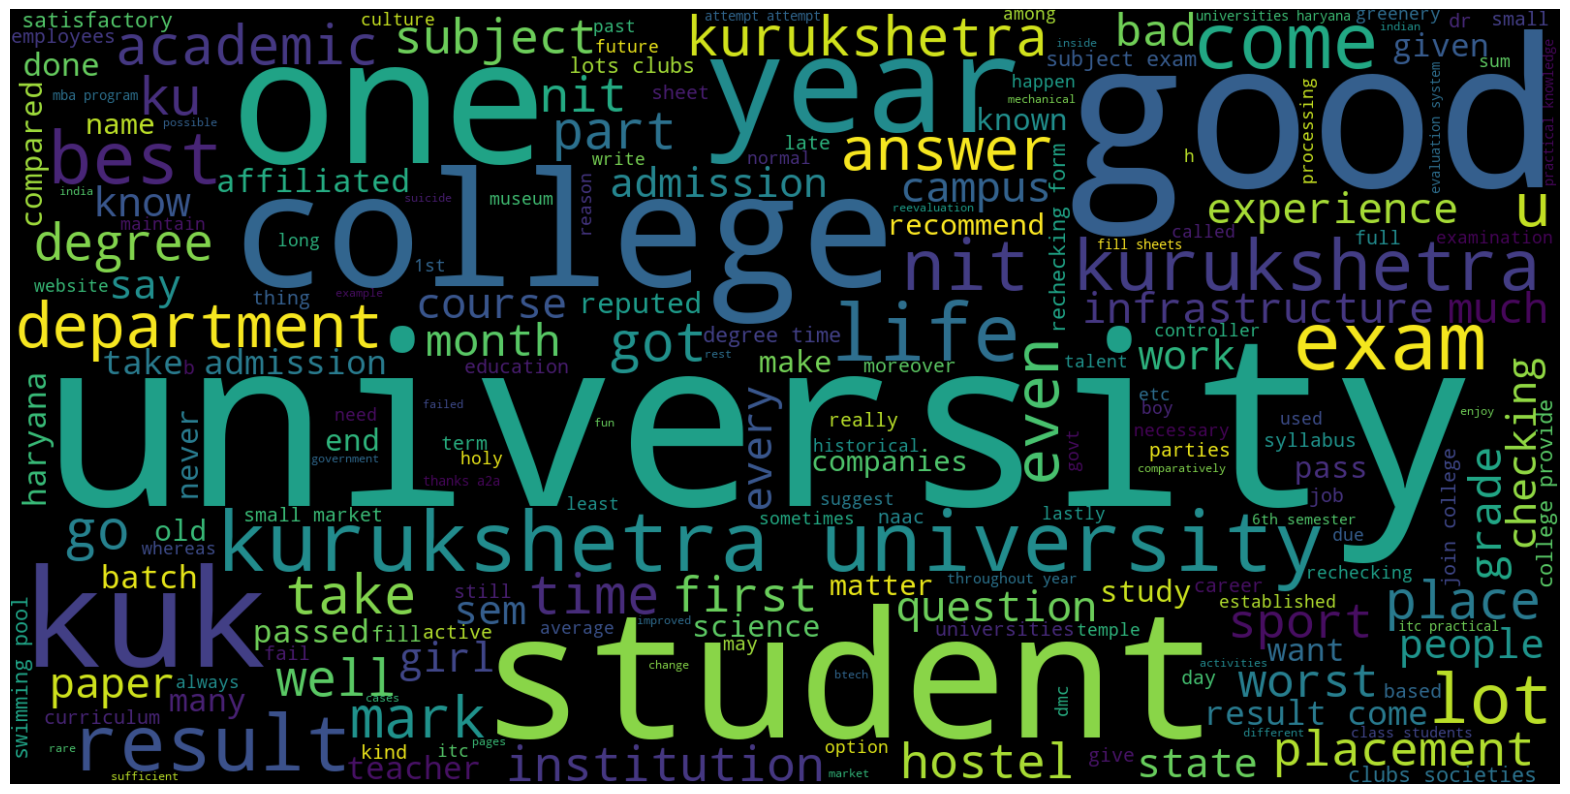

In [32]:
plt.figure(figsize=(20,20))
wc = WordCloud(width=1600, height=800).generate("".join(df['review']))
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()